In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

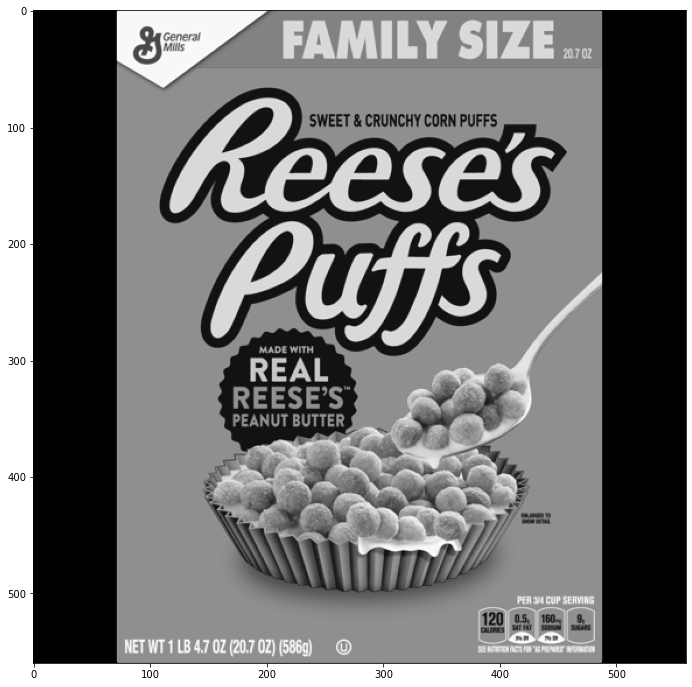

In [21]:
def displayImage(image):
    plt.figure(figsize=(18,12))
    plt.imshow(image,cmap="gray")
reeses=cv2.imread("../Computer-Vision-with-Python/DATA/reeses_puffs.png",0)
cereals=cv2.imread("../Computer-Vision-with-Python/DATA/many_cereals.jpg",0)
displayImage(loadImage())

# Brute-force matching with ORB Descriptors

In [6]:
orb=cv2.ORB_create()

In [8]:
key1,desc1=orb.detectAndCompute(reeses,None,)
key2,desc2=orb.detectAndCompute(cereals,None,)

In [9]:
matcher=cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
matches=matcher.match(desc1,desc2)


In [17]:
matches=sorted(matches,key=lambda x:x.distance)

In [29]:
reeses_copy=reeses.copy()
cereals_copy=cereals.copy()
resees_matches=cv2.drawMatches(reeses_copy,key1,cereals_copy,key2,matches[:10],None,2)

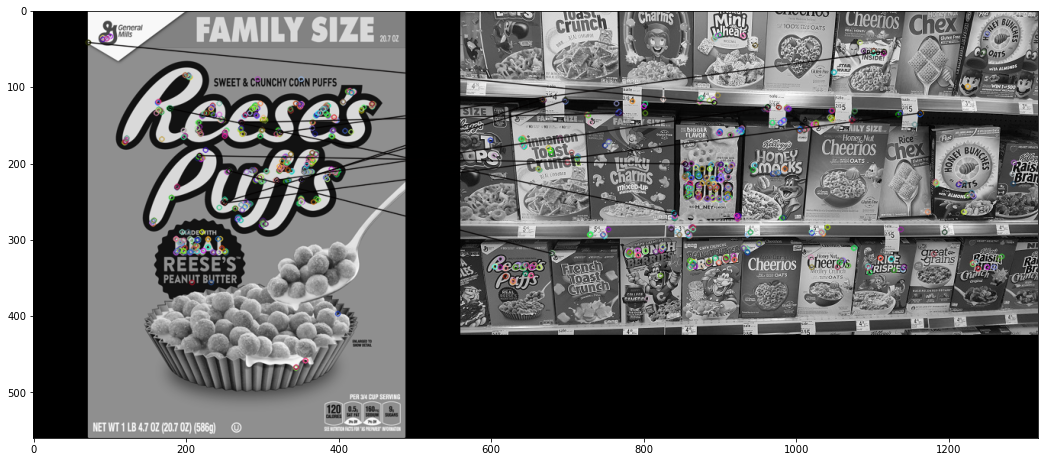

In [30]:
displayImage(resees_matches)

# Brute-force matching with SIFT Descriptors

In [42]:
sift=cv2.SIFT_create()

In [43]:
key1,desc1=orb.detectAndCompute(reeses,None,)
key2,desc2=orb.detectAndCompute(cereals,None,)

In [44]:
matcher=cv2.BFMatcher()

In [45]:
matches=matcher.knnMatch(desc1,desc2,k=2)

In [57]:
#matches
len(matches)

500

In [88]:
goodMatches=[]
for m1,m2 in matches:
    if m1.distance<0.75*m2.distance:
        goodMatches.append(m1)
        

In [89]:
len(goodMatches)

2

In [90]:
matchedImage=cv2.drawMatches(reeses,key1,cereals,key2,goodMatches,None,flags=2)

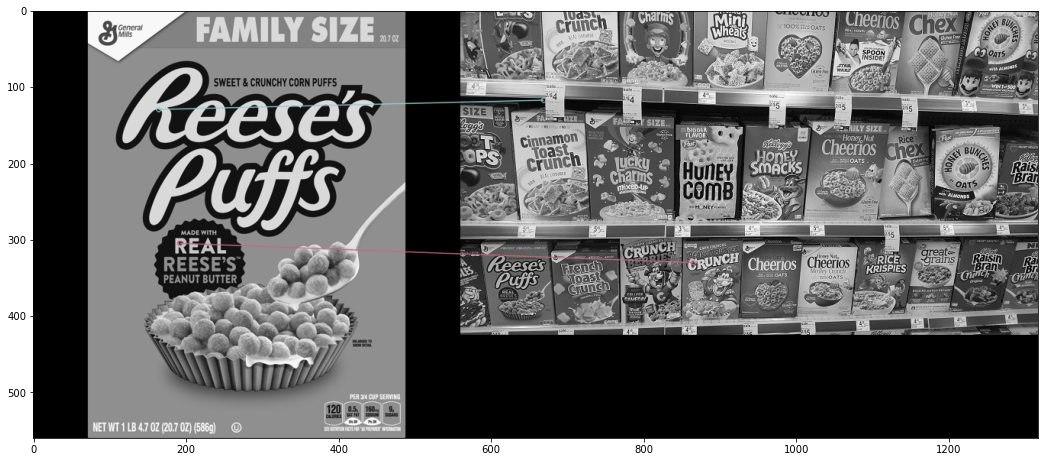

In [87]:
displayImage(matchedImage)

# FLANN based Matcher

In [91]:
sCreate=cv2.SIFT_create()

In [92]:
k1,d1=sCreate.detectAndCompute(reeses,None)
k2,d2=sCreate.detectAndCompute(cereals,None)

In [95]:
matcher=cv2.FlannBasedMatcher(dict(algorithm=0),dict(checks=50))
matches=matcher.knnMatch(d1,d2,2)

In [96]:
matches

((<DMatch 0x7fe0e6c17df0>, <DMatch 0x7fe0e6c171f0>),
 (<DMatch 0x7fe0e6c17dd0>, <DMatch 0x7fe0e6c17f50>),
 (<DMatch 0x7fe0e6c17330>, <DMatch 0x7fe0e6c17ab0>),
 (<DMatch 0x7fe0e6c17e10>, <DMatch 0x7fe0e6c17e30>),
 (<DMatch 0x7fe0e6c17f70>, <DMatch 0x7fe0e6c17310>),
 (<DMatch 0x7fe0e6c17590>, <DMatch 0x7fe0e6c17bb0>),
 (<DMatch 0x7fe0e6c17b70>, <DMatch 0x7fe0e6c17a30>),
 (<DMatch 0x7fe0e6c179b0>, <DMatch 0x7fe0e6c17b90>),
 (<DMatch 0x7fe0e6c17a50>, <DMatch 0x7fe0e6c17a10>),
 (<DMatch 0x7fe0e6c17a70>, <DMatch 0x7fe0e6c17730>),
 (<DMatch 0x7fe0e6c17710>, <DMatch 0x7fe0e6c176f0>),
 (<DMatch 0x7fe0e6c176d0>, <DMatch 0x7fe0e6c17eb0>),
 (<DMatch 0x7fe0e6c17ef0>, <DMatch 0x7fe0e6c17d30>),
 (<DMatch 0x7fe0e6c17d10>, <DMatch 0x7fe0e6c17c30>),
 (<DMatch 0x7fe0e6c17c10>, <DMatch 0x7fe0e6c17990>),
 (<DMatch 0x7fe0e6c17b50>, <DMatch 0x7fe0e6c17250>),
 (<DMatch 0x7fe0e6c17410>, <DMatch 0x7fe0e6c171b0>),
 (<DMatch 0x7fe0e6c34dd0>, <DMatch 0x7fe0e6c34d70>),
 (<DMatch 0x7fe0e6c34a50>, <DMatch 0x7fe0e6c34

In [112]:
good=[]
for m1,m2 in matches:
    if m1.distance<0.7*m2.distance:
        good.append([m1])

In [115]:
matchedImage=cv2.drawMatchesKnn(reeses,k1,cereals,k2,good,None,flags=2)

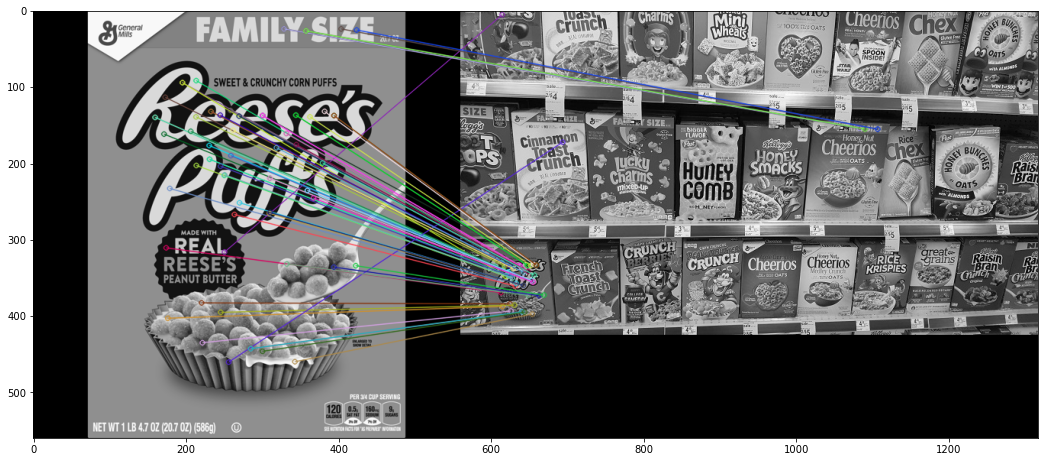

In [116]:
displayImage(matchedImage)

In [132]:
matchMasked=[[0,0] for i in matches]
for i,(m1,m2) in enumerate(matches):
    if m1.distance<0.7*m2.distance:
        matchMasked[i]=[1,0]

In [136]:
drawParams=dict(matchColor=(0,0,255),singlePointColor=(255,0,0),matchesMask=matchMasked,flags=0)

In [137]:
matchedImage=cv2.drawMatchesKnn(reeses,k1,cereals,k2,matches,None,**drawParams)

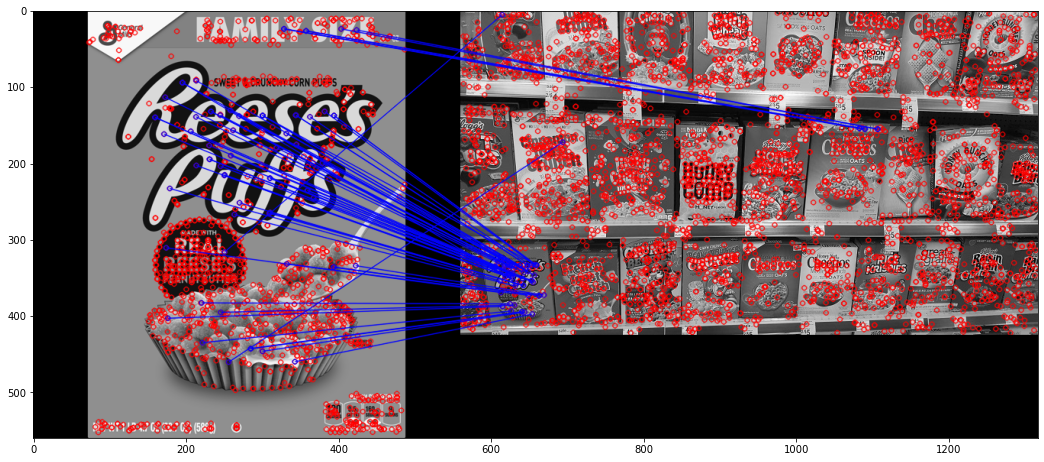

In [138]:
displayImage(matchedImage)